### 1. An analogue function fa has as maximum spatial frequency value of f_sx = 10^2 mm−1 . This function is to be converted into a discrete function f_d by sampling with equidistant sampling points spaced at a distance Δx = 0.05 mm. What can be said in general about the sampled function f_d ?

### 2. For a square grid, mark the points of equal distance according to the discrete maximum distance D8 for the neighboring points of a pixel p

### 3. An image b_SB of dimension 8x8 shows a regular black and white chequerboard pattern with 64 squares (size 1x1); the pixel b_SB(0, 0) has the value black.
#### a) What type of image is the image bSB ?
#### b) Sketch the brightness profile (intensity line profile) of the third line ( j = 2) of b_SB (black=0, white=1).
#### c) Sketch the histogram h(b_SB) of the image b_SB .

### 4. What is the essential difference between
#### a) a point operation and a local operation
#### b) between a homogeneous and an inhomogeneous image operation?

### 5. Formally describe the transformation function T_pI for an inversion of
#### a) binary images b(i, j)
#### b) gray scale images g(i, j).

## Image Enhancement Filters

### 1. Load a grayscale image of your choice into MATLAB. Add a salt and pepper noise to the image (imnoise).

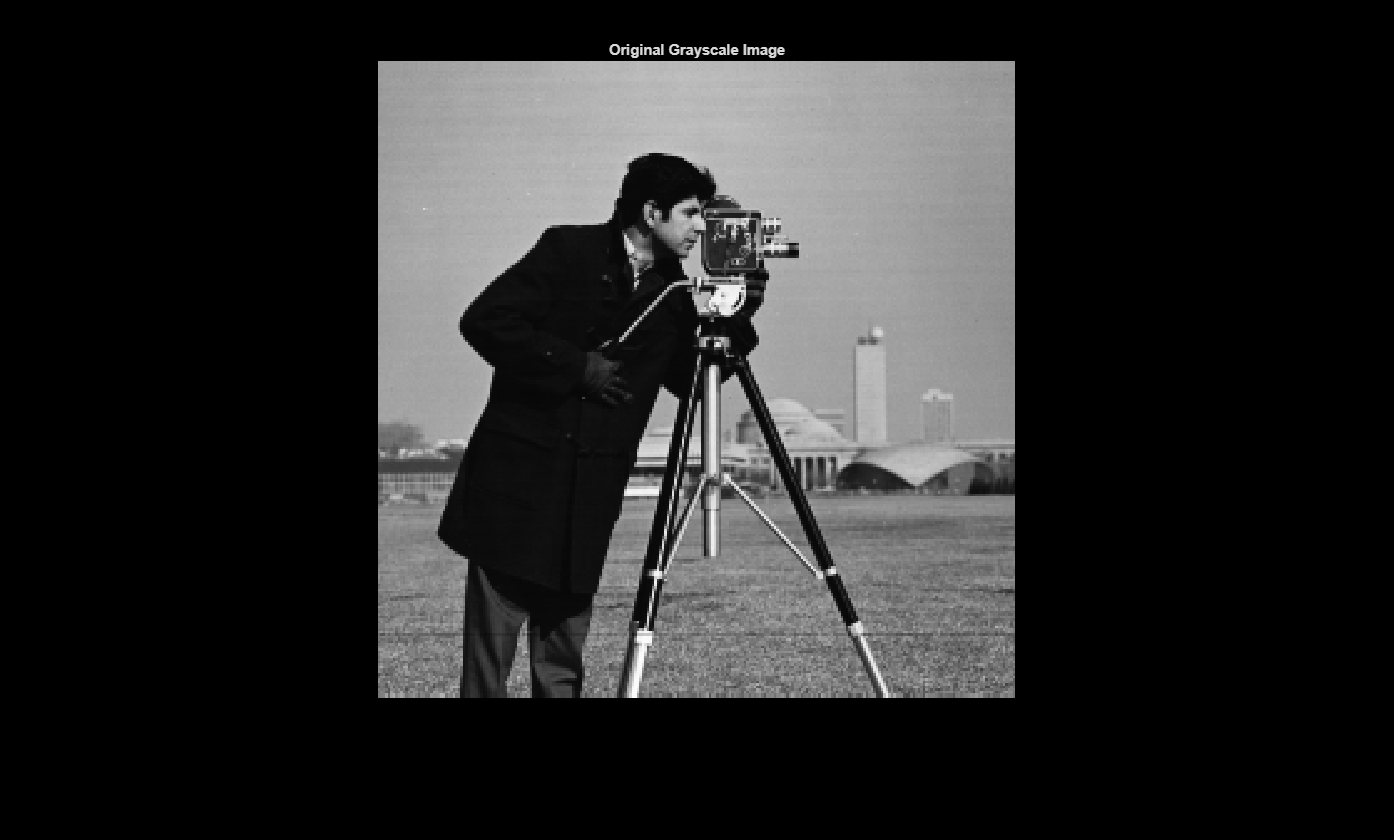

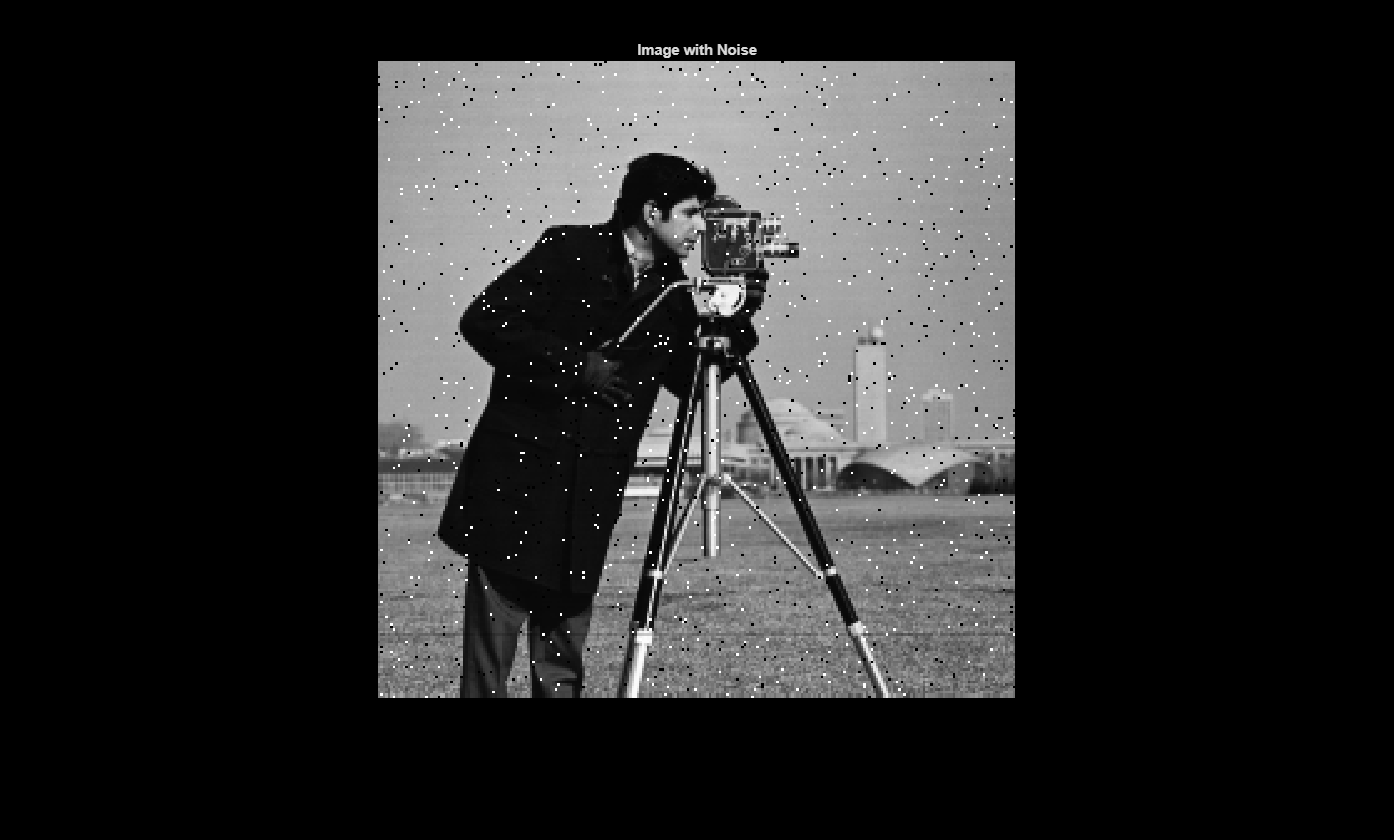

In [3]:
% Load a grayscale image
img = imread('cameraman.tif');  

% Display the original image
figure;
imshow(img);
title('Original Grayscale Image');

% Add salt and pepper noise to the image
noisy_img = imnoise(img, 'salt & pepper', 0.02);  % 0.02 is the noise density

% Display the noisy image
figure;
imshow(noisy_img);
title('Image with Noise');


### 2. Try to reduce the noise using
#### a. an average filter specified as a convolution kernel (conv2 or filter2)
####   i. Try different filter kernel sizes, e.g. 3x3 and 6x6. 


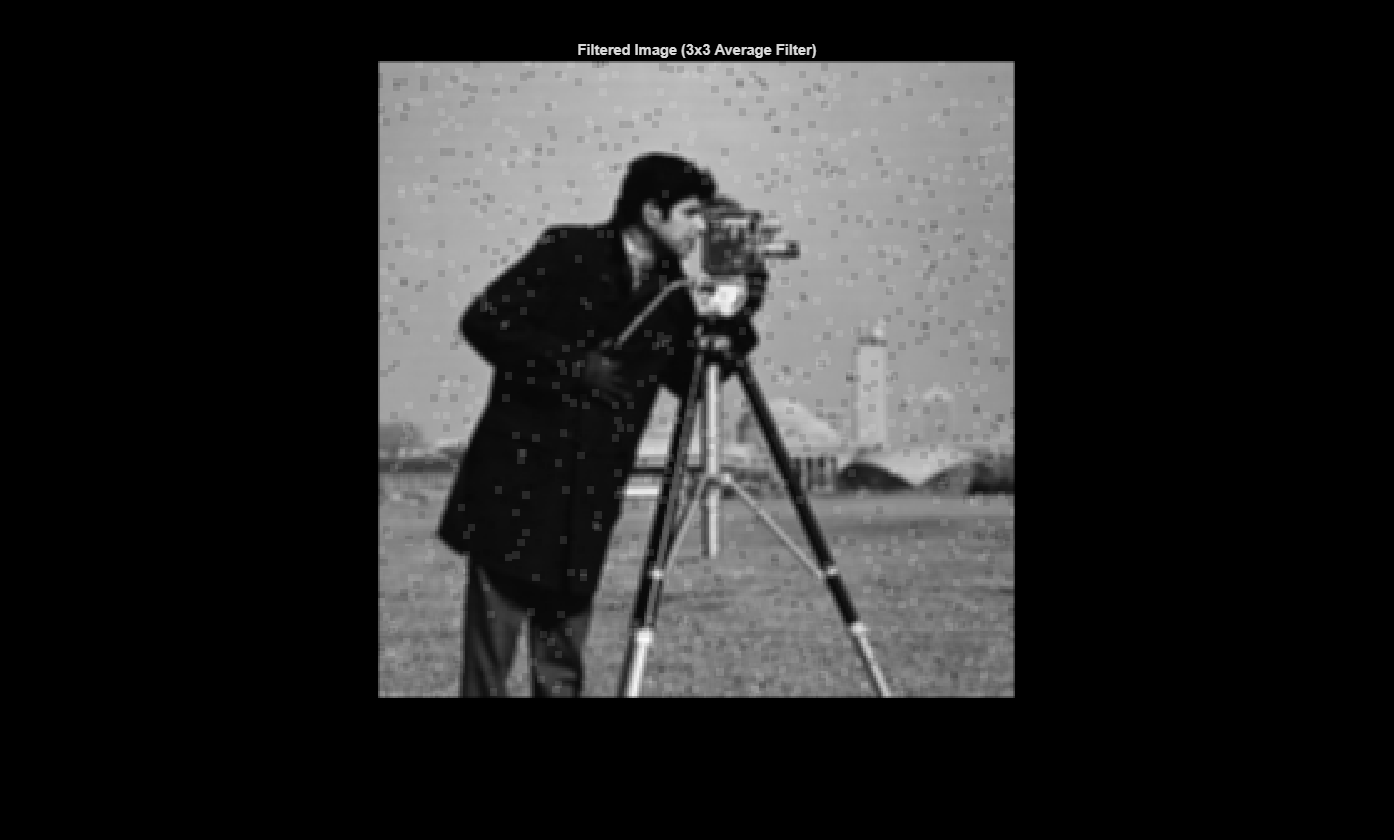

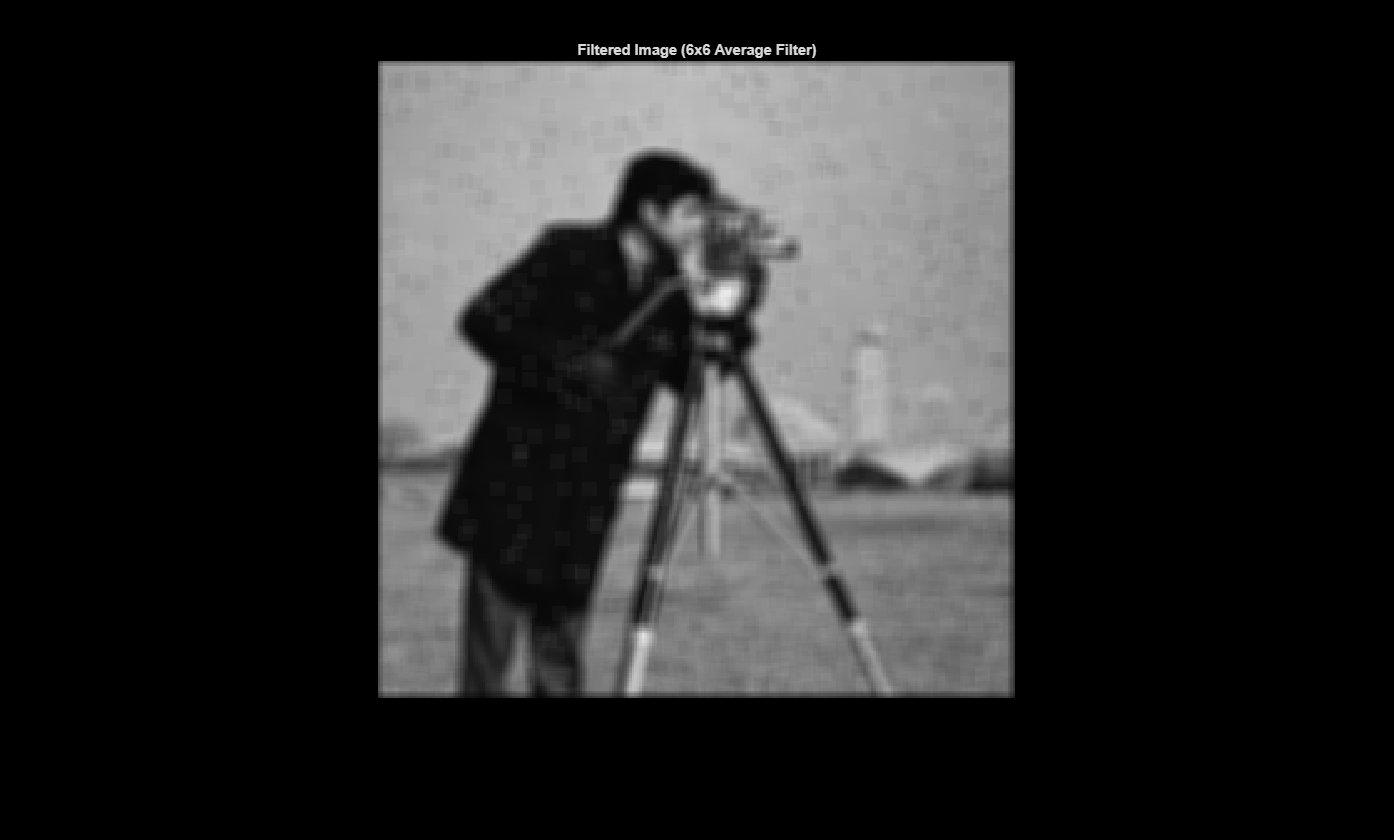

In [4]:
% Create an average filter (3x3 kernel)
h_3x3 = ones(3, 3) / 9;  % 3x3 averaging filter

% Apply the 3x3 average filter using conv2
filtered_img_3x3 = conv2(double(noisy_img), h_3x3, 'same');  % Keep output the same size as input

% Display the filtered image (3x3 filter)
figure;
imshow(uint8(filtered_img_3x3));
title('Filtered Image (3x3 Average Filter)');

% Create an average filter (6x6 kernel)
h_6x6 = ones(6, 6) / 36;  % 6x6 averaging filter

% Apply the 6x6 average filter using conv2
filtered_img_6x6 = conv2(double(noisy_img), h_6x6, 'same');

% Display the filtered image (6x6 filter)
figure;
imshow(uint8(filtered_img_6x6));
title('Filtered Image (6x6 Average Filter)');


####  b. A gaussian filter approximated by a convolution kernel (conv2, filter2)


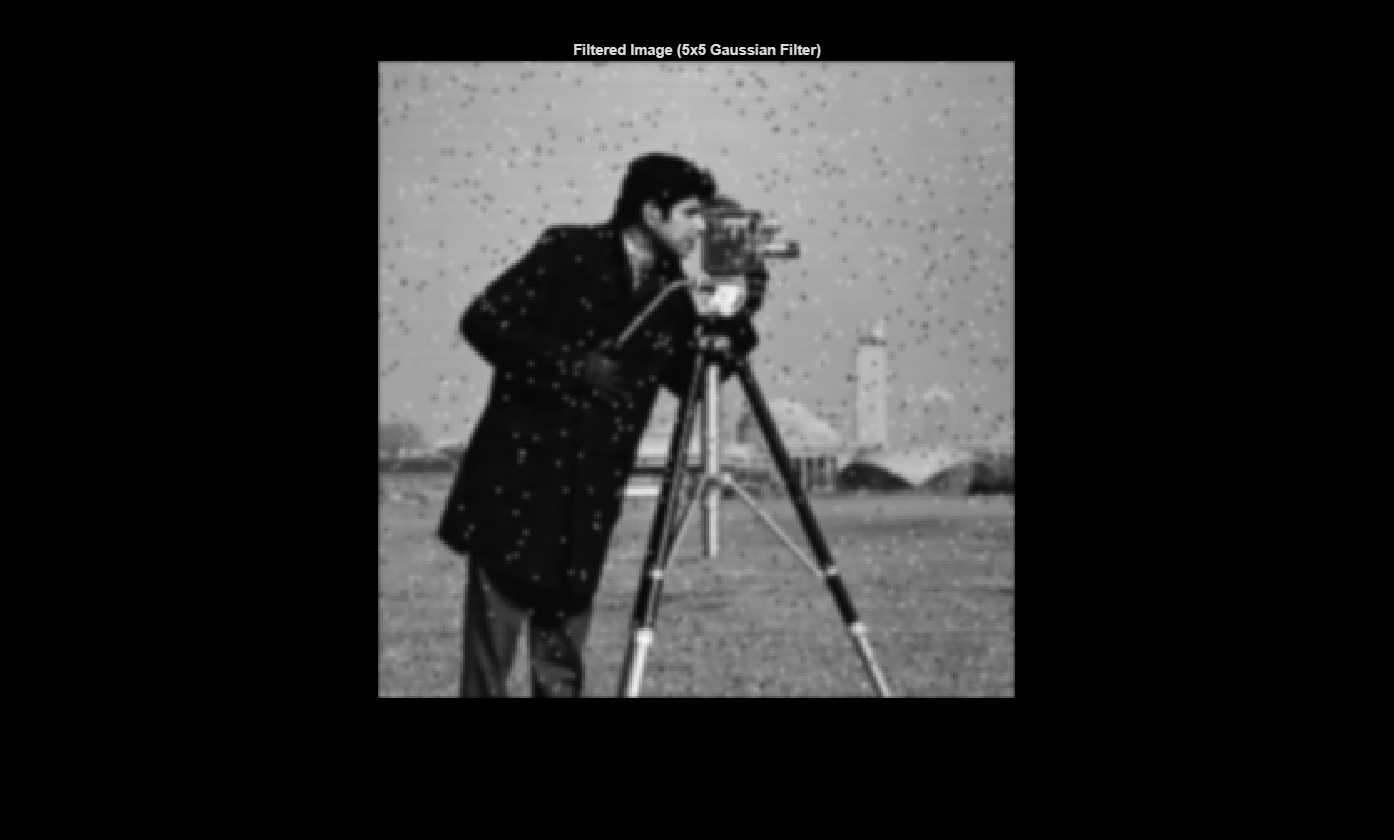

In [5]:
% Create a Gaussian filter (approximated by a 5x5 kernel)
sigma = 1;  % Standard deviation for Gaussian filter
size = 5;   % Define the kernel size (5x5)

% Create a 5x5 Gaussian filter kernel
h_gaussian = fspecial('gaussian', [size, size], sigma);

% Apply the Gaussian filter using conv2
filtered_img_gaussian = conv2(double(noisy_img), h_gaussian, 'same');

% Display the filtered image
figure;
imshow(uint8(filtered_img_gaussian));
title('Filtered Image (5x5 Gaussian Filter)');


#### c. The MATLAB function fspecial provides special convolution kernels for filters “with a name” (for example gaussian). Filter the image with a gaussian filter using fspecial and filter2.

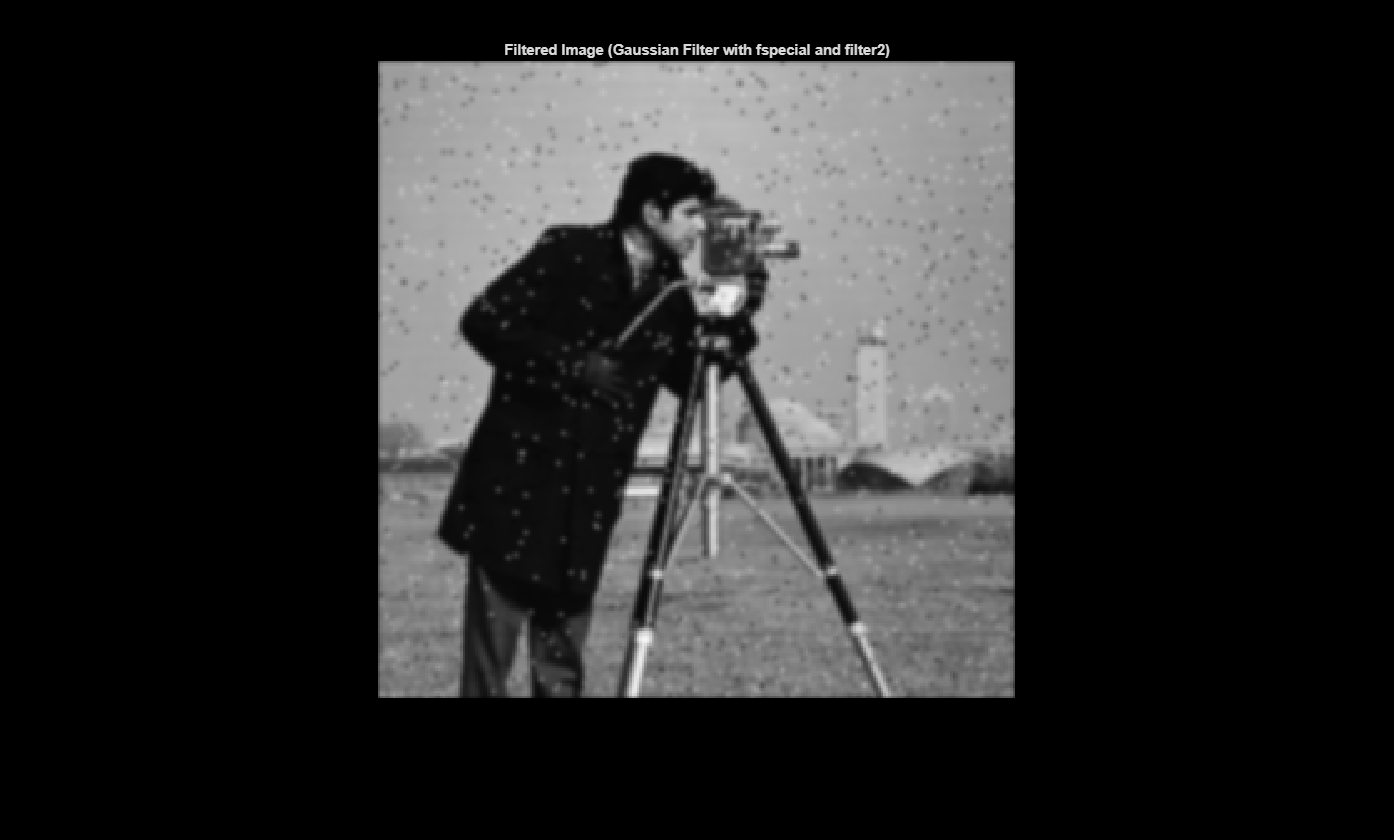

In [6]:
% Create a Gaussian filter using fspecial
sigma = 1;  % Standard deviation for Gaussian filter
size = 5;   % Define the kernel size (5x5)

% Create a Gaussian filter kernel using fspecial
h_gaussian = fspecial('gaussian', [size, size], sigma);

% Apply the Gaussian filter using filter2
filtered_img_gaussian = filter2(h_gaussian, double(noisy_img), 'same');

% Display the filtered image
figure;
imshow(uint8(filtered_img_gaussian));
title('Filtered Image (Gaussian Filter with fspecial and filter2)');


### 3. Apply a median filter to the image with the added salt and pepper noise (medfilt2)
#### a. Try different filter kernel sizes, e.g. 3x3 and 6x6.

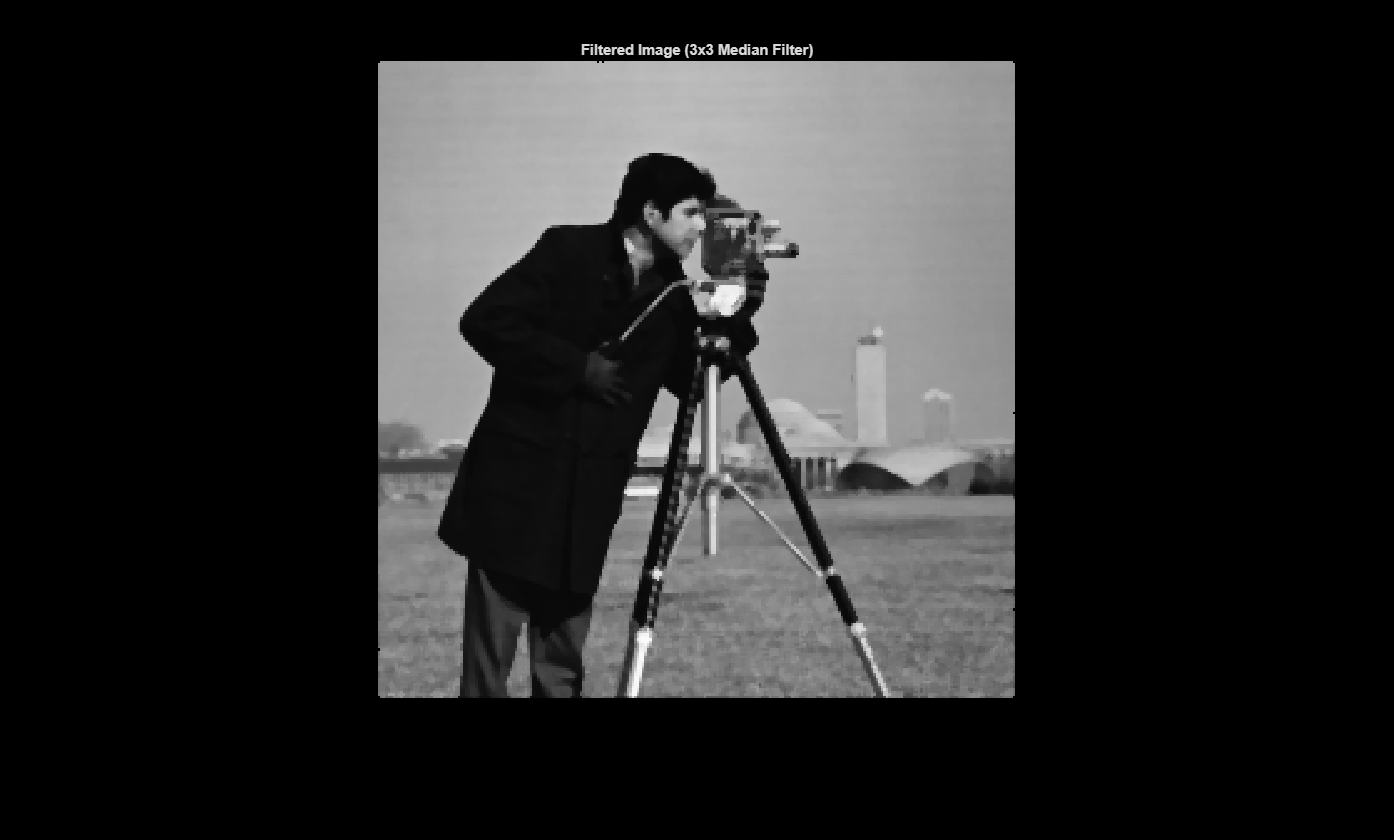

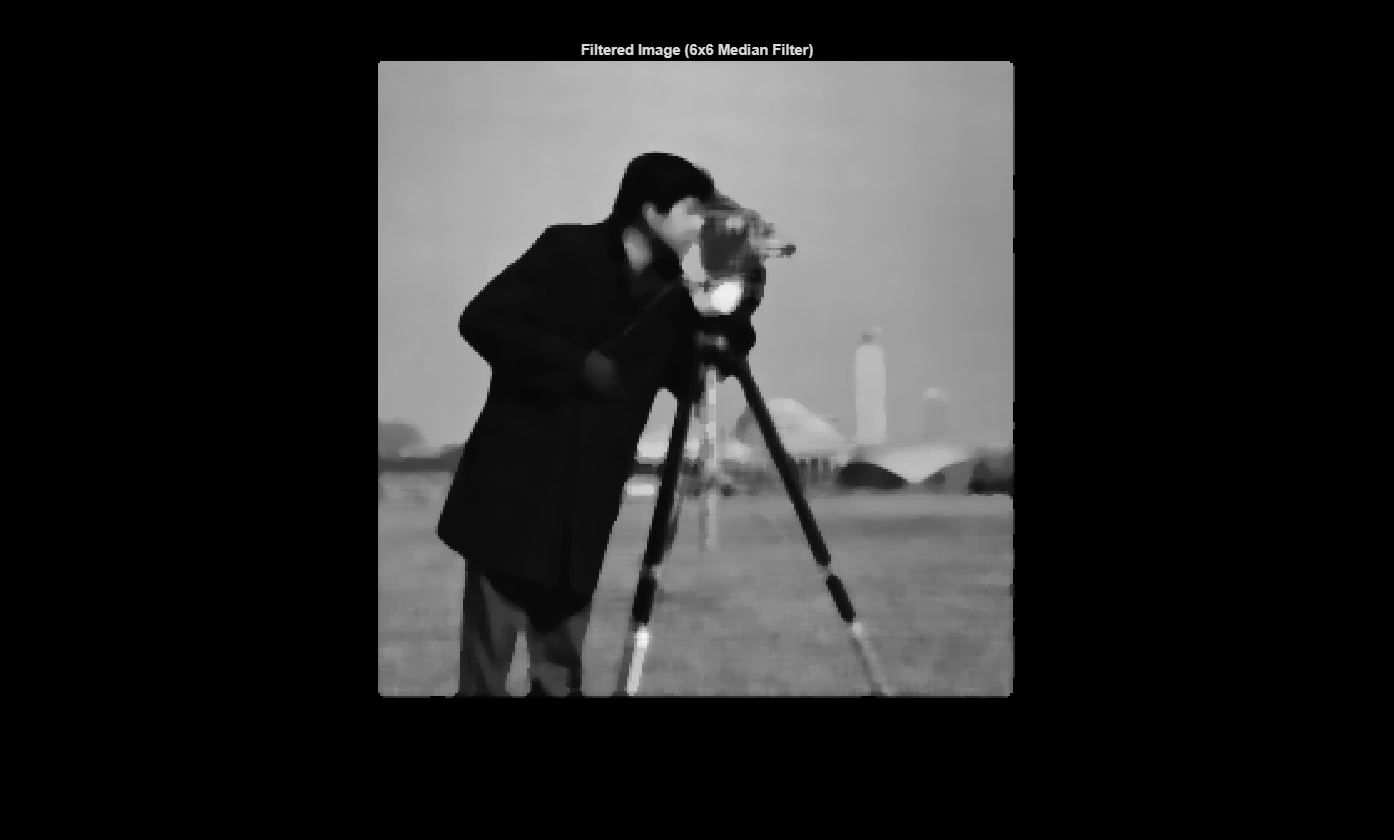

In [7]:
% Apply a 3x3 median filter
filtered_img_3x3 = medfilt2(noisy_img, [3 3]);

% Display the image after applying 3x3 median filter
figure;
imshow(filtered_img_3x3);
title('Filtered Image (3x3 Median Filter)');

% Apply a 6x6 median filter
filtered_img_6x6 = medfilt2(noisy_img, [6 6]);

% Display the image after applying 6x6 median filter
figure;
imshow(filtered_img_6x6);
title('Filtered Image (6x6 Median Filter)');


### 4. Formulate a local image operation TL (Laplace operator) that subtracts the pixel values of the N4 neighborhood from four times the value of the central pixel and apply this kernel using filter2 to the original noise-free image.

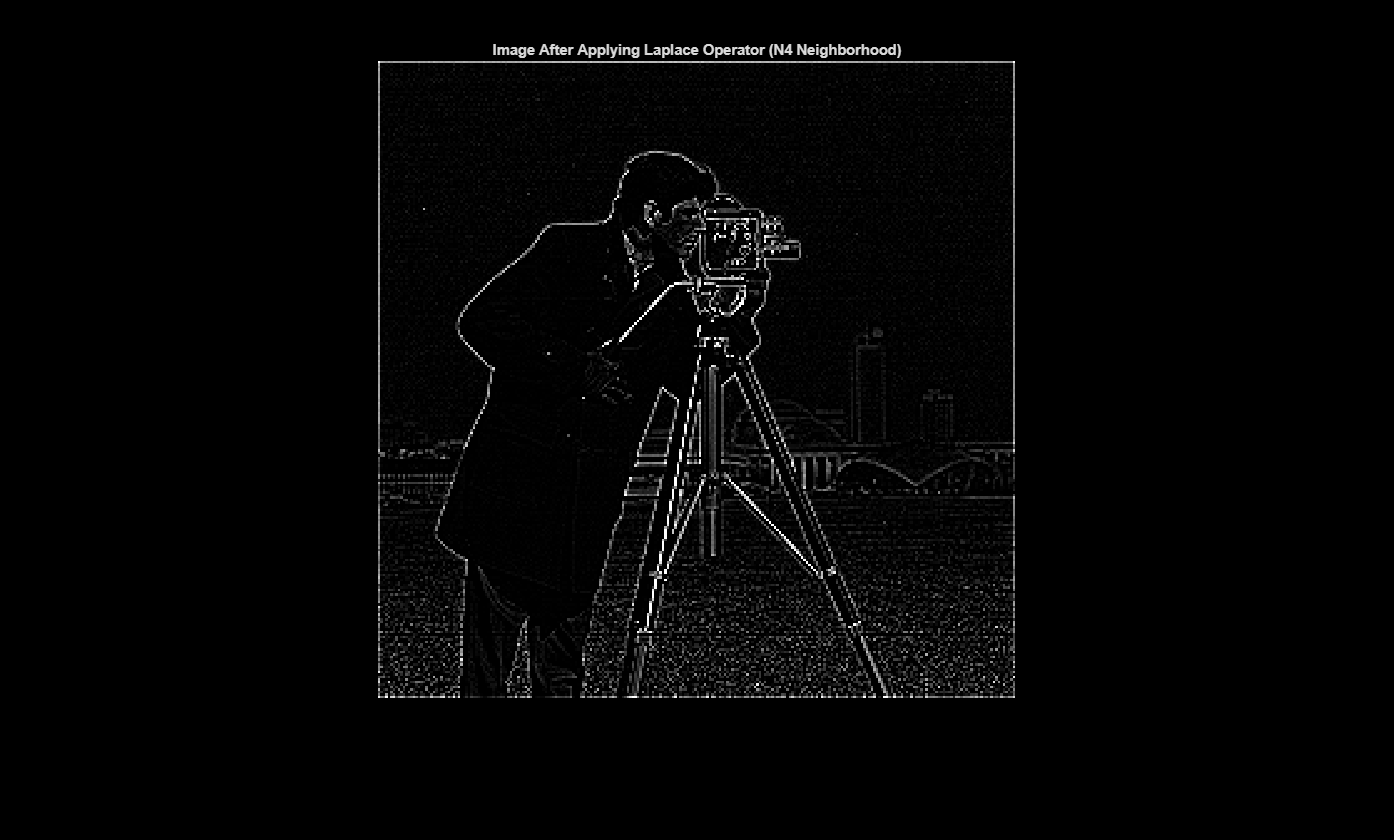

In [8]:
% Define the Laplace operator for the N4 neighborhood
laplace_kernel = [0 -1 0; -1 4 -1; 0 -1 0];

% Apply the Laplace operator using filter2
laplace_img = filter2(laplace_kernel, double(img), 'same');

% Display the result of applying the Laplace operator
figure;
imshow(uint8(laplace_img));
title('Image After Applying Laplace Operator (N4 Neighborhood)');
